### Configuração inicial:


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [12]:
np.set_printoptions(suppress=True)
SEED_VALUE = 202407
np.random.seed(SEED_VALUE)

biomass = pd.read_csv("data/5 - Biomassa - Dados.csv")
X = biomass.drop(columns=['biomassa'])
y = biomass['biomassa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)
def space():
    print("\n\n")

def calculate_syx(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def print_metrics(y_true, y_pred):
    print("R2:", r2_score(y_true, y_pred))
    print("Syx:", calculate_syx(y_true, y_pred))
    print("PEARSON:", pearsonr(y_true, y_pred)[0])
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))

### KNN:

In [8]:
knn_tune_grid = {'n_neighbors':  np.arange(1, 20, 2)}
knn_model = GridSearchCV(KNeighborsRegressor(), knn_tune_grid, cv=10)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print_metrics(y_test, knn_pred)



R2: 0.5343657256067441
Syx: 1673.0459155902847
PEARSON: 0.7958928548587787
RMSE: 1673.0459155902847
MAE: 368.7926666666668


### RNA:

In [5]:
# HOLD OUT
rna_model = MLPRegressor(max_iter=500, random_state=SEED_VALUE)
rna_model.fit(X_train, y_train)
rna_pred = rna_model.predict(X_test)
print("HOLD OUT: \n")
print_metrics(y_test, rna_pred)


space()

# CV
rna_tune_grid = {'hidden_layer_sizes': [(size,) for size in np.arange(1,46,10)], 'alpha':  np.arange(0.1, 0.9, 0.1)}
rna_cv_model = GridSearchCV(MLPRegressor(max_iter=500, random_state=SEED_VALUE), rna_tune_grid, cv=10)
rna_cv_model.fit(X_train, y_train)
rna_cv_pred = rna_cv_model.predict(X_test)
print("CV: \n")
print_metrics(y_test, rna_cv_pred)

/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


HOLD OUT: 

R2: 0.3862518869825603
Syx: 1920.7926040001553
PEARSON: 0.89932029434636
RMSE: 1920.7926040001553
MAE: 606.4418963991574





/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached 

CV: 

R2: 0.14834393650229916
Syx: 2262.6506842256827
PEARSON: 0.8949313211256702
RMSE: 2262.6506842256827
MAE: 596.7111418358119


/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabriel.barreto/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### SVM:

In [9]:
# HOLD OUT
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("HOLD OUT: \n")
print_metrics(y_test, svm_pred)

space()

# CV
svm_tune_grid = {'C': range(1,100,23), 'gamma': range(1,10,2)}
svm_cv_model = GridSearchCV(SVR(), svm_tune_grid, cv=10)
svm_cv_model.fit(X_train, y_train)
svm_cv_pred = svm_cv_model.predict(X_test)
print("CV: \n")
print_metrics(y_test, svm_cv_pred)

HOLD OUT: 

R2: -0.05456393292601702
Syx: 2517.8035807312535
PEARSON: 0.20670185399105798
RMSE: 2517.8035807312535
MAE: 627.2338714060054



CV: 

R2: -0.04488997386935134
Syx: 2506.2285376113596
PEARSON: 0.23336472896378463
RMSE: 2506.2285376113596
MAE: 606.2304623693815


### RF:

In [10]:
# HOLD OUT
rf_model = RandomForestRegressor(random_state=SEED_VALUE)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("HOLD OUT: \n")
print_metrics(y_test, rf_pred)


space()

#CV
rf_tune_grid = {'n_estimators': [200], 'max_features': range(2,11,3)}
rf_cv_model = GridSearchCV(RandomForestRegressor(random_state=SEED_VALUE), rf_tune_grid, cv=10)
rf_cv_model.fit(X_train, y_train)
rf_cv_pred = rf_cv_model.predict(X_test)
print("CV: \n")
print_metrics(y_test, rf_cv_pred)

HOLD OUT: 

R2: 0.7041712546963969
Syx: 1333.5385525323359
PEARSON: 0.9368893640398333
RMSE: 1333.5385525323359
MAE: 269.74205216666684



CV: 

R2: 0.6965853258794781
Syx: 1350.5282724205886
PEARSON: 0.9319736573902252
RMSE: 1350.5282724205886
MAE: 266.9106367222221


### TESTE DE NOVOS CASOS COM O MELHOR MODELO:  RF - HOLD OUT

   dap   h    Me  biomassa
0   14  20  0.64  141.4786
1   15  20  0.61  133.7263
2   11  13  0.46   24.0274


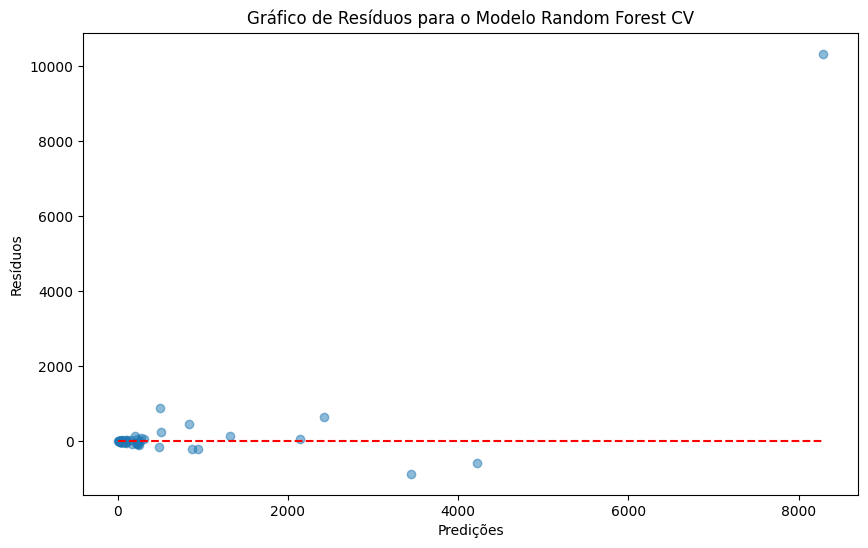

In [27]:
admission_new_cases = pd.read_csv("data/5 - Biomassa - Novos_Dados.csv")
result_prediction = rf_model.predict(admission_new_cases.drop(columns='biomassa'))
admission_new_cases['biomassa'] = result_prediction
print(admission_new_cases)

rf_cv_predictions = rf_cv_model.predict(X_test)
residuals = y_test - rf_cv_predictions

plt.figure(figsize=(10, 6))
plt.scatter(rf_cv_predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(rf_cv_predictions), xmax=max(rf_cv_predictions), colors='r', linestyles='dashed')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos para o Modelo Random Forest CV')
plt.savefig('residuos_rf_cv.png')
plt.show()